Ez az első projekt bemutatja a pandákat, a Python legnépszerűbb adatkezelő eszközét.

A Pandák a mi svájci késünk, ha Pythonban az adatelemzésről/tudományról van szó. A következőkre használjuk:

     Írható/olvasható adatok betöltése/kiírása: különböző formátumokba és onnan (CSV, XML, HTML, Excel, JSON, akár az internetről is)
     Adatok elemzése: statisztikai elemzés végrehajtása, adatok lekérdezése, következetlenségek keresése stb
     Adattisztítás: hiányzó értékek, ismétlődő adatok, érvénytelen vagy hibás értékek keresése stb
     Vizualizációk: a matplotlib támogatásával gyorsan megjeleníthetjük az adatokat
     Data Wrangling/Munging: egy nem tudományos fogalom, amely adatkezelést foglal magában: több adatforrás összevonása, származtatott reprezentációk létrehozása, adatok csoportosítása stb.

Ebben a projektben nem fogsz sokat tanulni a Pandák használatáról, de működés közben látni fogod. Tehát ne aggódjon, ha nem érzi jól magát az itt bemutatottak „csinálása” során, mindezt a következő projektekben elmagyarázzuk.

In [15]:
import pandas as pd
basepath = r'D:\DataWars\source'
filename = r'\SPX.csv'
df_original = pd.read_csv(basepath + filename, parse_dates=True)
df_original.head()
df_original.tail()

df_original['Date'] = df_original['Date'].astype('datetime64[ns]')
df_original.loc[(df_original['Date'] >= '2017-01-03') & (df_original['Date'] <= '2022-12-30')]
df = df_original


Először elkezdjük importálni a pandas könyvtárat, és mivel annyira használjuk, szeretünk létrehozni egy rövid pd aliast. Ezután betöltjük a projekt mintaadatkészletét: az S&P500 indexet 2017 és 2022 között. \
Az adatokat a read_csv metódussal töltjük be. Ezekben a laborokban látni fogja, hogy a pandák sokféle formátumból tudnak adatokat betölteni, és a metódusok általában read_XXX; például: read_json, read_excel, read_xml stb. \
A CSV-ben található adatokat a df: a DataFrame változóba töltöttük be. A DataFrame-ek a Pandák által használt kulcsfontosságú adatszerkezetek, és SOKAT fog látni belőlük a következő projektekben; szóval, egyelőre ne aggódj túl sokat. \
Ezután néhány gyors pillantást vetünk az adatokra a .head() és .tail() metódusokkal. Ennek az az oka, hogy a pandák több millió sor (vagy még több) kezelésére készülnek. Tehát nem szoktuk a teljes adatot "kinyomtatni", csak gyorsan belekukkantunk. \
A .head() metódus az első 5 sort mutatja, a .tail() metódus az utolsó 5 sort. Azonnal láthatja, hogy a DataFrame nagyjából úgy néz ki, mint egy Excel tábla. Tartalmaz egy indexet, amely a leolvasás dátuma.

Az adatok elemzése

Az elemzési szakasz természetesen az adott feladattól és az aktuális adatoktól függ. Ez csak egy példa a pandák képességeire. \
Kezdjük a .describe() metódussal, amely gyors összefoglaló statisztikát ad a teljes DataFrame-ről. Olyan információink vannak, mint az átlag (átlag), max stb. \
Egyetlen oszlopról is kaphatunk konkrét információkat: df['Close'].min() vagy df['Close'].max(). Ó, egyébként most láttad, hogyan kell végrehajtani az "egyoszlopos kijelölést": df['Close'].head().

In [16]:
#Gyors statisztika
df.describe()
#Minimum, maximum
df['Close'].min()
df['Close'].max()
#Oszlop kiválasztása
df['Close'].head()

0    17.660000
1    17.760000
2    17.719999
3    17.549999
4    17.660000
Name: Close, dtype: float64

Vizualizációk

<Axes: ylabel='Frequency'>

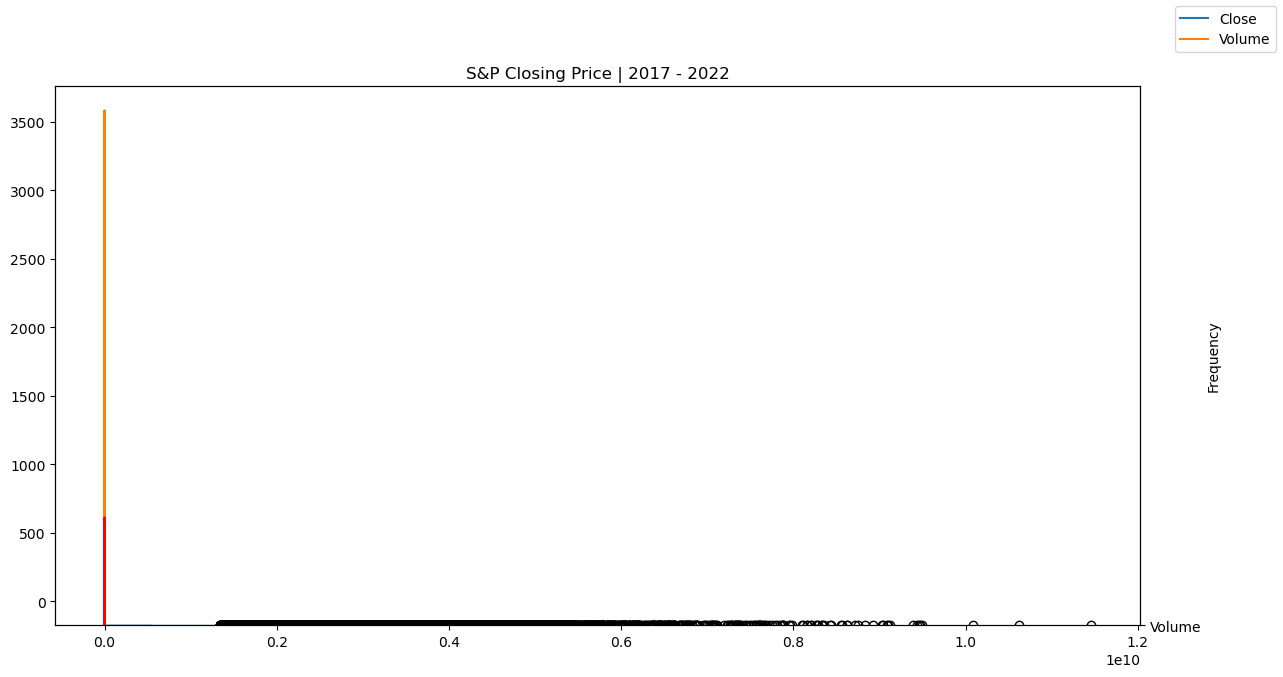

In [17]:
#Vonaldiagram a záróértékhez
df['Close'].plot(figsize=(14, 7), title='S&P Closing Price | 2017 - 2022')

#Összetettebb diagram, amiben a záróérték is ott van
ax1 = df['Close'].plot(figsize=(14, 7), title='S&P Closing Price | 2017 - 2022')
ax2 = ax1.twinx()
df['Volume'].plot(ax=ax2, color='red', 
                    ylim=[df['Volume'].min(), 
                    df['Volume'].max() * 5])
ax1.figure.legend(["Close", "Volume"])

#Hisztogram
df['Volume'].plot(kind='hist')

#Box plot
df['Volume'].plot(kind='box', vert=False)

Data wrangling

A pandák kiválóan teljesítenek az adatvívás/kezelés/munka terén. Rengeteg műveletet el tudunk végezni, például adathalmazok kombinálását, csoportosítását, olvasztását, pivot táblák létrehozását stb. \
Van egy teljes Skill Track, amelyet csak az adatforgatásnak szentelünk, így sejtheti, milyen erős.\
Egyelőre csak néhány egyszerű műveletre összpontosítunk. Kiszámoljuk a Bollinger sávokat az S&P500 adatainkhoz.\

A Bollinger sávok csak egy egyszerű vizualizációs/elemzési technika, amely két sávot, egy "tetőt" és egy "padlót" hoz létre egy adott idősorhoz. \
Az indoklás az, hogy ha az idősor a "padló" alatt van, akkor az történelmi mélypont, ha pedig a "tető" felett van, akkor történelmi csúcs. \
Ami a részvényárakat és más pénzügyi eszközöket illeti, ha az árfolyam átlép egy sávot, azt mondják, hogy túl olcsó vagy túl drága.

A Bollinger-sáv az egyszerű mozgóátlag feletti/alatti két szórás. Ez sok fogalom, de alapvetően először meg tudjuk \
határozni az egyszerű mozgóátlagot a .rolling(WINDOW).mean() metódussal (a követéshez váltson a laborba).\
Az SMA megértése kívül esik ennek a projektnek a hatókörén, de alapvetően egy „simító” módszer. Láthatja, hogyan követi az SMA a záró árat, de ekkora volatilitás nélkül. \
Most a sávok meghatározásához 2 szórást kell kiszámítanunk az ár felett/alatt:


Záró ár és az SMA (Simple Moving Average)

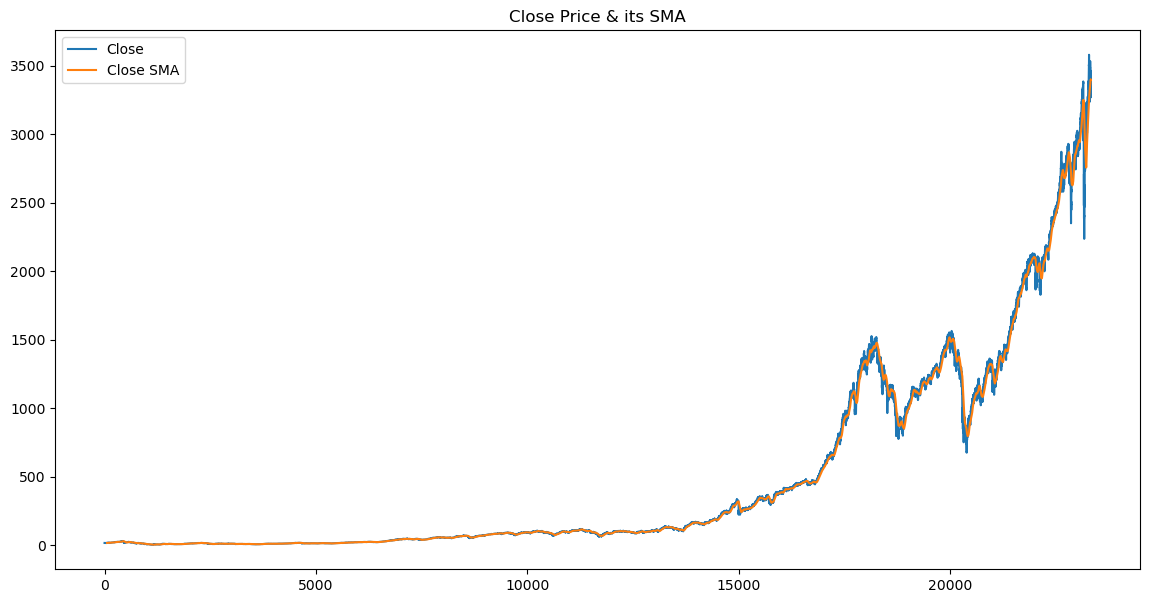

In [18]:
df['Close SMA'] = df['Close'].rolling(60).mean()
df[['Close', 'Close SMA']].tail(10)
ax = df[['Close', 'Close SMA']].plot(figsize=(14, 7), 
                                     title='Close Price & its SMA')

Calculate the bands as:

Lower Band = Close SMA - 2 * rolling std \
Upper Band = Close SMA + 2 * rolling std



<Axes: title={'center': 'Close Price & its SMA'}>

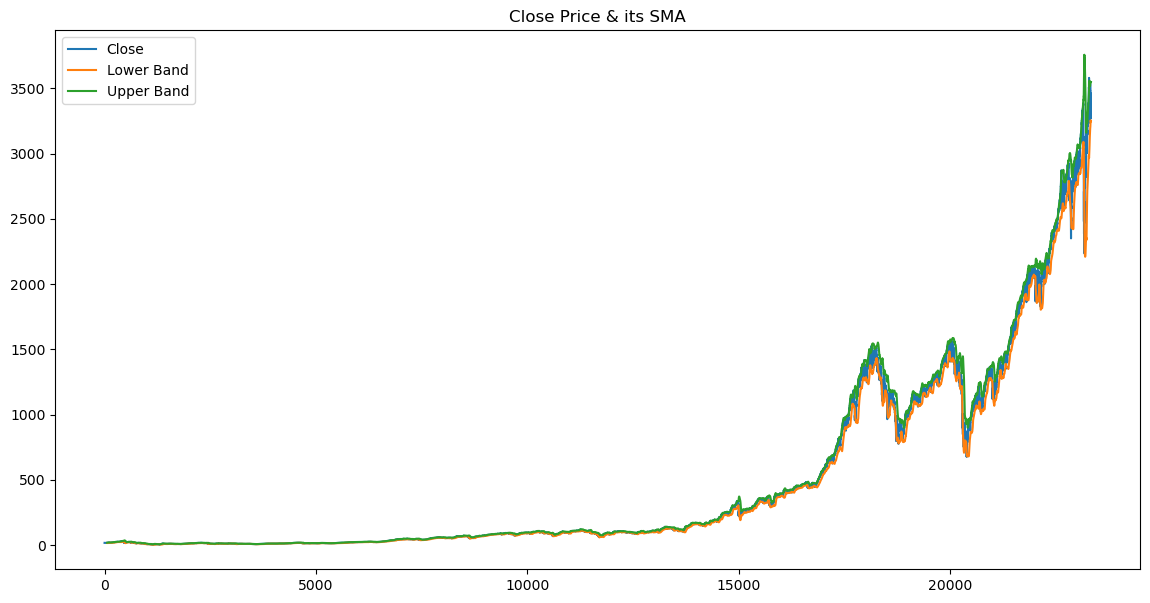

In [19]:
df['Lower Band'] = df['Close SMA'] - (2 * df['Close'].rolling(60).std())
df['Upper Band'] = df['Close SMA'] + (2 * df['Close'].rolling(60).std())
df[['Close', 'Close SMA', 'Lower Band', 'Upper Band']].tail()
df[['Close', 'Lower Band', 'Upper Band']].plot(figsize=(14, 7), 
                                               title='Close Price & its SMA')

Let's find that lower point that crosses the lower band:

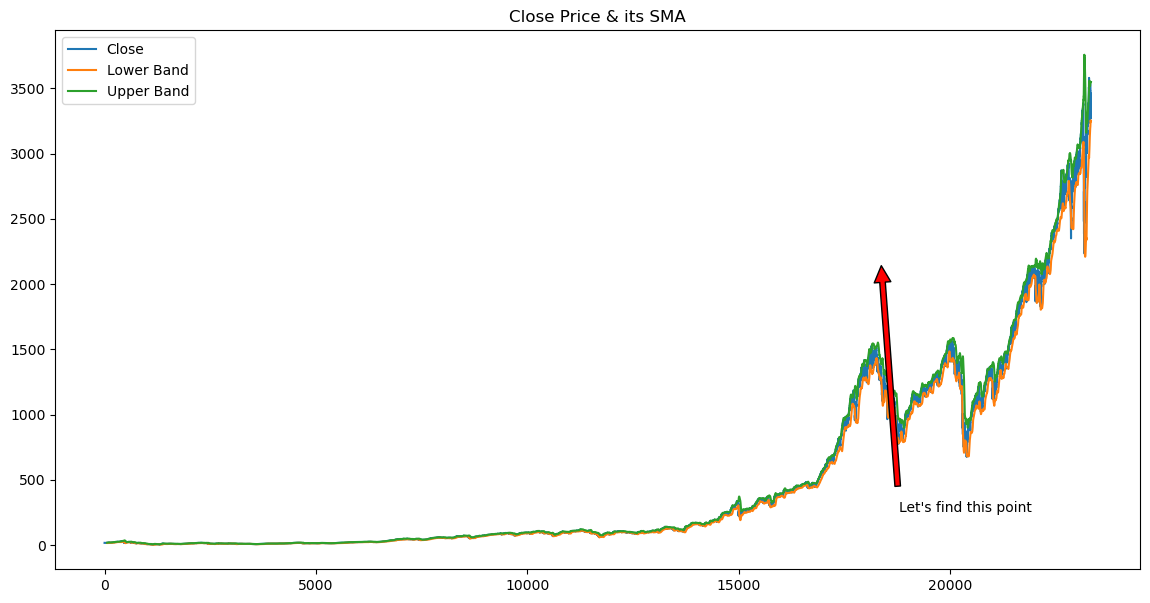

In [20]:
ax = df[['Close', 'Lower Band', 'Upper Band']
        ].plot(figsize=(14, 7), title='Close Price & its SMA')
ax.annotate(
    "Let's find this point", xy=(pd.Timestamp("2020-03-23"), 2237), 
    xytext=(0.9, 0.1), textcoords='axes fraction',
    arrowprops=dict(facecolor='red', shrink=0.05),
    horizontalalignment='right', verticalalignment='bottom');

We can quickly query all the dates that crossed the lower band (in the period 2020-03-01 to 2020-06-01)

In [21]:
df.loc['2020-03-01': '2020-06-01'].query("Close < `Lower Band`").head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close SMA,Lower Band,Upper Band


And finally, we can zoom in in that period:

<Axes: title={'center': 'Close Price & its SMA | 2020-01-01 to 2020-06-01'}>

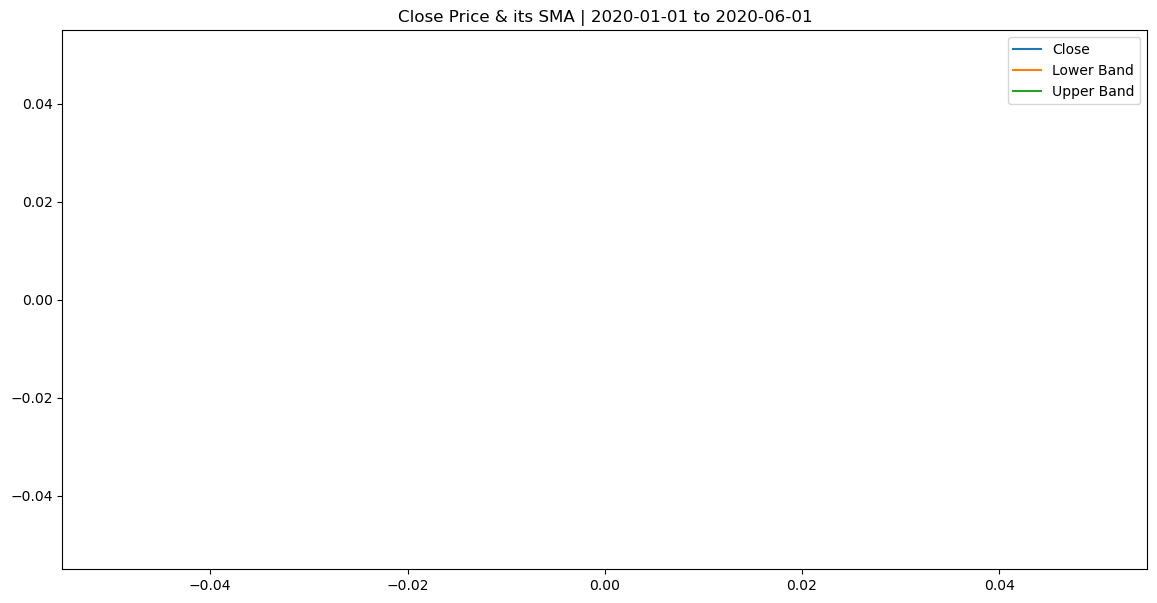

In [22]:
df.loc['2020-01-01': '2020-06-01', ['Close', 'Lower Band', 'Upper Band']
       ].plot(figsize=(14, 7), 
              title='Close Price & its SMA | 2020-01-01 to 2020-06-01')

Záró megjegyzések

Amint láthattad, a pandák egy rendkívül hatékony könyvtár, rengeteg funkcióval. Ez lesz a Data Science eszközsáv leghasznosabb könyvtára.

Most azonban itt az ideje, hogy megismerje, és elkezdje egyedül használni. A Skill Track projektjei végigvezetik Önt az adatelemzési és adattudományi pandák elsajátításának folyamatán.

Sok sikert és jó szórakozást!
